In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,31,

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv('Mall_Customers.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df=df.drop(['CustomerID'],axis=1)

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
pip install mitosheet

     |████████████████████████████████| 3.9 MB 4.3 MB/s 
     |████████████████████████████████| 22.9 MB 1.2 MB/s 
     |████████████████████████████████| 7.9 MB 12.6 MB/s 
     |████████████████████████████████| 71 kB 179 kB/s 
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.5.9 requires jupyter-client>=6.1.5, but you have jupyter-client 5.3.5 which is incompatible.


In [ ]:
df.rename(columns={'Spending Score (1-100)':'Score','Annual Income (k$)':'Income'},inplace=True)

In [ ]:
df

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
k_range=range(1,12)

In [ ]:
wcss=[]
for i in k_range:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df[['Income','Score']])
  wcss.append(kmeans.inertia_)

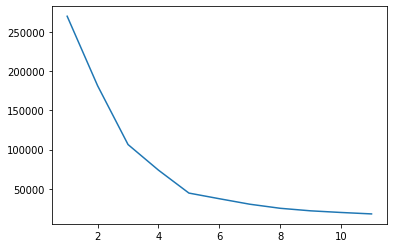

In [ ]:
plt.plot(k_range,wcss)

In [ ]:
kmeans=KMeans(n_clusters=5)

In [ ]:
kmeans.fit(df[['Income','Score']])

KMeans(n_clusters=5)

In [ ]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1
0,25.727273,79.363636
1,88.200000,17.114286
2,86.538462,82.128205
3,26.304348,20.913043
4,55.296296,49.518519


In [ ]:
df['Clusters']=kmeans.labels_

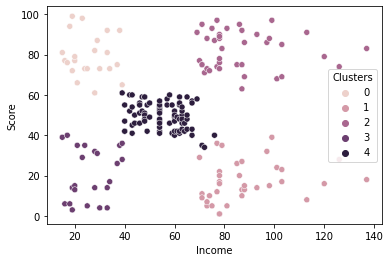

In [ ]:
sns.scatterplot(x='Income',y='Score',hue='Clusters',data=df)

In [ ]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first=True)

In [ ]:
df

,Gender,Age,Income,Score,Clusters
0,1,19,15,39,3
1,1,21,15,81,0
2,0,20,16,6,3
3,0,23,16,77,0
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


In [ ]:
df=df.drop(['Clusters'],axis=1)
x=df.drop(['Score'],axis=1)
y=df['Score']

In [ ]:
x

,Gender,Age,Income
0,1,19,15
1,1,21,15
2,0,20,16
3,0,23,16
4,0,31,17
...,...,...,...
195,0,35,120
196,0,45,126
197,1,32,126
198,1,32,137


In [ ]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Score, Length: 200, dtype: int64

In [ ]:
Max=MinMaxScaler(feature_range=(1,2))

In [ ]:
Mx=Max.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Mx,y,test_size=0.1,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
KNN=KNeighborsRegressor(n_neighbors=35)

In [ ]:
KNN.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=35)

In [ ]:
KNN.score(xtest,ytest)

0.01506507959272485